# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [49]:
RANDOM_STATE = 666

# Apartado 1: Clustering

__Número de grupo: 5__

__Nombres de los estudiantes: Belén Sánchez Centeno y Martín Fernández de Diego__

## 1) Carga del conjunto de datos

**Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países.**

In [3]:
countries_of_the_world = 'countries_of_the_world.csv'
dataframe = pd.read_csv(countries_of_the_world,index_col=0)

**Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.**

In [4]:
dataframe = dataframe.drop(['Region'],axis=1)
dataframe = dataframe.dropna()

**Muestra el dataframe resultante y explica cuántos países y variables contiene.**

In [5]:
dataframe

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


Contiene 179 países y 18 variables porque cada país viene dado por una fila y cada variable por una columna.

## 2) Análisis de los datos

*En este notebook vamos a trabajar con un subconjunto de las variables.*

**Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (\%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?**

In [6]:
dataframe_restricted = dataframe.loc[:,['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service']]

In [7]:
dataframe_restricted

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381
Yemen,800.0,50.2,37.2,0.135,0.472,0.393


Estas variables son importantes indicadores del grado de desarrollo económico y social de un Estado.  
**`GDP ($ per capita)`**: Gross Domestic Product ($ per capita): El valor total de los bienes y servicios ofrecidos por cada persona de un país al año.
**`Literacy (%)`**: Porcentaje de alfabetización de un país.  
**`Phones (per 1000)`**: Número de teléfonos móviles por cada mil personas de un país.  
**`Agriculture`,`Industry`,`Services`**: Fracción de los beneficios procedentes de cada sector.    

**Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).**

##### Análisis de las variables

In [8]:
dataframe_restricted.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


**`GDP ($ per capita)`**: En este caso, la media es una variable poco realista puesto que la desviación típica es muy alta. Podemos encontrarnos con países con valores inferiores a 1000 y otros, los que menos, con valores de más de 30000. Son los que menos porque se puede ver como el 75\% de los países tienen un valor inferior a los 13000 y solo el 25\% restante tiene valores entre 13000 y 38000.  

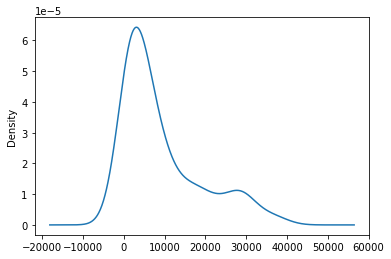

In [9]:
# Reparto de GDP ($ per capita)
dataframe_restricted['GDP ($ per capita)'].plot.density()

**`Literacy (%)`**: El grueso de los países tiene a la mayoría de su población alfabetizada. Sin embargo, sí nos podemos encontrar con países muy subdesarrollados, como el que ostenta el valor mínimo, con un nivel de alfabetizacion del 17,6\%. La desviación típica no es excesiva y es acentuada por el 25\% de los países con una alfabetización inferior al 70\%.  

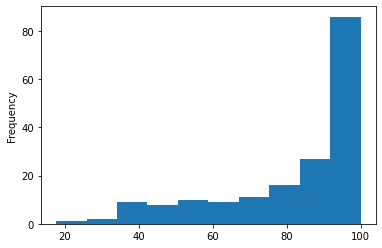

In [10]:
# Frecuencias en las que se encuentran los distintos niveles de alfabetizacion
dataframe_restricted['Literacy (%)'].plot.hist()

**`Phones (per 1000)`**: Desconocemos la fecha del muestreo de los datos del fichero, sim embargo, podemos estimarla observando la población de España. Suponemos que el muestreo corresponde a principios de siglo, cuando España contaba con 40.000.000 de personas aproximadamente.  
La media de este dato se ve hoy con un valor excesivamente bajo dado el nivel de digitalización de la sociedad mundial. La desviación típica del momento era notable y es que, la mayoría de países tenía niveles ínfimos y, otros, el 25\%, tenía valores superiores a 335 por cada 1000. Como curiosidad, hoy en España hay 1206 teléfonos móviles por cada 1000 personas, más móviles que personas.  

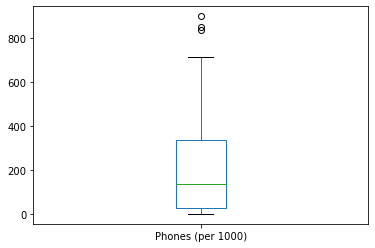

In [11]:
# Distribucion de telefonos moviles
dataframe_restricted['Phones (per 1000)'].plot.box()

**`Agriculture`,`Industry`,`Services`**: Podemos analizar estas variables conjuntamente.  
Las medias globales nos indican que la economía mundial se basa en más del 55\% en el sector servicios, a continuación, con cerca de un 30\% en la industria y con un 15\% en la agricultura. Hay países que basan casi exclusivamente su producción en el sector servicios, en cambio, no ocurre lo mismo con la agricultura, donde el país que más cultiva ocupa un 76,9\% de su PIB.

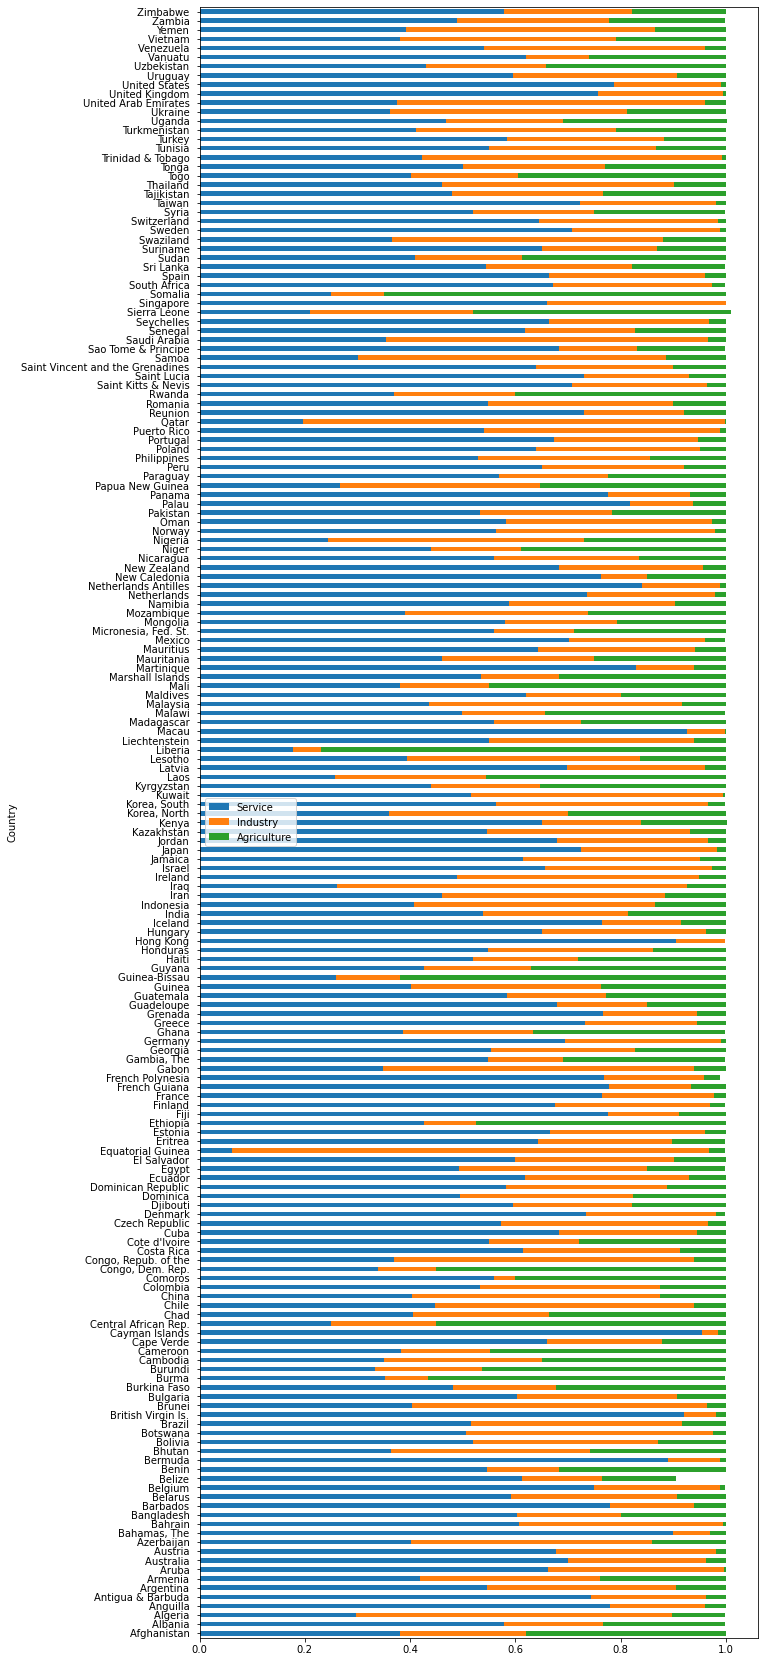

In [12]:
dataframe_restricted.loc[:,['Service','Industry','Agriculture']].plot.barh(figsize=(10,30),stacked=True);

##### Relaciones entre pares de variables

In [13]:
dataframe_restricted.corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


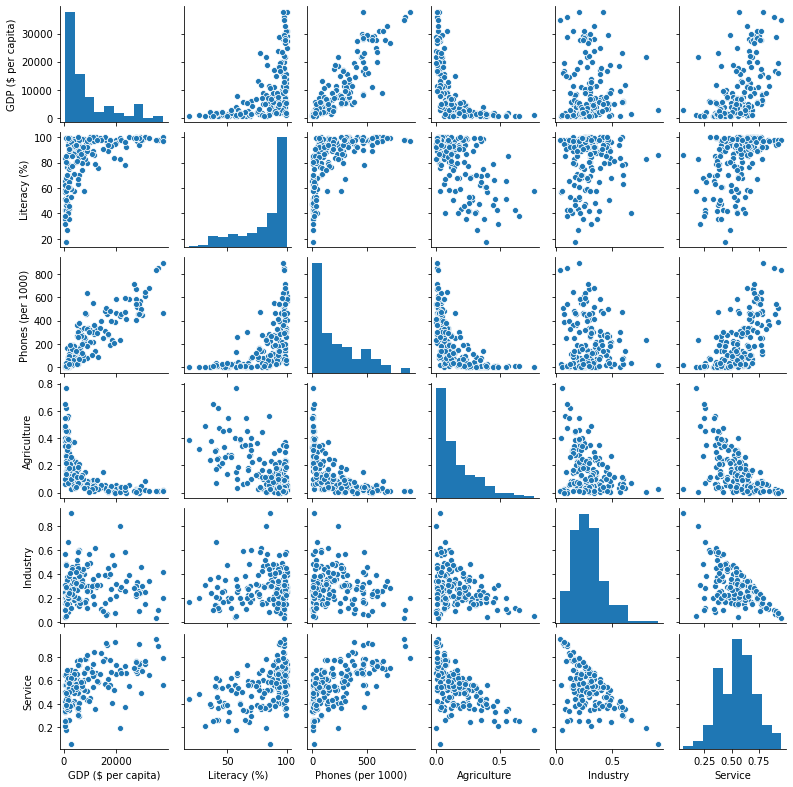

In [14]:
sns.pairplot(dataframe_restricted,height=1.8)

**`GDP ($ per capita)`** - **`Literacy (\%)`**: En los países con mayor capital observamos que los valores de culturización solo toman valores rotundamente altos. Sin embargo, podemos encontrar también países subdesarrollados con todo tipo de niveles de alfabetización, desde muy bajo hasta niveles propios de economías superdesarrolladas.  
**`GDP ($ per capita)`** - **`Phones (per 1000)`**: Estas variables presentan un nivel alto de correlación dada la clara dispersión diagonal creciente del *cluster*. Es evidente imaginar que las economías más desarrolladas tiene una población con mayor acceso a nuevas tecnologías. Como hemos estimado que estos datos corresponden a los 2000, entendemos la correlación, aunque actualmente podríamos suponer que esta gráfica es menos diagonal y más dispersa. Estas dos variables, son las que presentan un mayor coeficiente de correlación.  
**`GDP ($ per capita)`** - **`Agriculture`**: Observamos que a mayor nivel de desarrollo económico hay una menor especialización de la economía en el sector agrícola. Los países económicamente subdesarrollados, en cambio, adoptan otras muchas formas de especialización.  
**`GDP ($ per capita)`** - **`Industry`**: En este caso, tenemos una clara dispersión, por lo que podemos concluir que el nivel de desarrollo y el de industrialización no están claramente ligados. También poseemos un coeficiente de correlación realmente bajo, lo cual nos confirma lo que veíamos en la gráfica.  
**`GDP ($ per capita)`** - **`Service`**: Aunque también es una gráfica bastante dispersa, sí que podemos ver cierta correlación, donde los países con mayor poder adquisitivo ostentan niveles de especialización en el sector servicios más altos.  
**`Literacy (\%)`** - **`Phones (per 1000)`**: A menor nivel de alfabetización, menor cantidad de móviles por cada 1000 personas. Lógicamente, las personas que ni siquiera saben leer o escribir no son capaces de manejar un móvil moderno. Luego, vemos a países con niveles altos de alfabetización con todo tipo de cantidades de móviles, de nuevo porque corresponde a principios de siglo, propablemente hoy esta gráfica sería mucho más diagonal.  
**`Literacy (\%)`** - **`Agriculture`**: Aunque la gráfica presenta una alta dispersión, sí que se observa una diagonal descendente. Y es que es claro que una sociedad más analfabetizada dedica gran parte de su producción al sector agrícola, como ocurrió en España a lo largo del siglo XX.  
**`Literacy (\%)`** - **`Industry`**: De nuevo, nos encontramos con una gráfica poco clara y con un alto nivel de dispersión. No podemos sacar conclusiones definitivas de la relación entre la alfabetización y la industrialización de un país.  
**`Literacy (\%)`** - **`Services`**: De forma simétrica a con la agricultura, nos encontramos con una gráfica que nos indica que los niveles de alfabetización sí que influyen en la especialización en el sector servicios de un país. También es cierto que nos encontramos con sociedades menos culturizadas que ostentan niveles no muy bajos de dedicación a los servicios.  
**`Phones (per 1000)`** - **`Agriculture`**: Dos variables claramente ligadas, a mayor cantidad de móviles menor nivel de producción agrícola.  
**`Phones (per 1000)`** - **`Industry`**: Esta gráfica, aunque está algo dispersa, indica que a mayor cantidad de móviles, menor nivel de industrialización. El *cluster* se concentra en la zona inferior izquierda, es decir, la mayoría de países con niveles bajos de industrialización tienen pocos teléfonos móviles. Presenta un coeficiente de correlación bajo.  
**`Phones (per 1000)`** - **`Service`**: Se nos presenta una gráfica dispersa pero podemos esbozar una diagonal creciente. Por tanto, nos indica que a mayor cantidad de móviles mayor industrialización. Y, como hemos visto antes, la cantidad de móviles por cada 1000 personas es una variable estrictamente ligada con la economía de un país, así que todas estas comparativas con la tasa de móviles son similares a las comparativas con los niveles de desarrollo económico.  
**`Agriculture`** - **`Industry`**: El *cluster* esboza un triángulo inferior que tiene un claro corte en la diagonal decreciente. Esto es claro, a mayor especialización agrícola, menor industrialización. También podemos observar que a menor especialización agrícola, el nivel de la indsutrialización no es evidente, ya que muchos países no fundamentalmente agrícolas también dedican sus economías al sector servicios.  
**`Agriculture`** - **`Service`**: Aunque es una gráfica bastante similar a la anterior nos encontramos que los puntos se posicionan más entorno a la diagonal decreciente. Por tanto, existe un mayor nivel de correlación entre variables.  
**`Industry`** - **`Service`**: Una gráfica muy similar a la anterior. La correlación es mayor aún y no encontramos ningún punto por encima de la diagonal.

## 3) Preprocesar los datos

**Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).**

**Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.**

Es necesario reescalar puesto que unos datos se diferencian por cientos, otros por miles y otros están entre 0 y 1, por lo que k-Means no va a tener en cuanta a estos últimos.
A priori parece que es mejor reescalar los datos (MinMaxScaler) ya que las cotas inferiores y superiores son conocidas y no todas son distribuciones normales.  
  
A continuación, mostramos el array previo a su modificación.

In [15]:
dataframe_restricted.values

array([[7.00e+02, 3.60e+01, 3.20e+00, 3.80e-01, 2.40e-01, 3.80e-01],
       [4.50e+03, 8.65e+01, 7.12e+01, 2.32e-01, 1.88e-01, 5.79e-01],
       [6.00e+03, 7.00e+01, 7.81e+01, 1.01e-01, 6.00e-01, 2.98e-01],
       ...,
       [8.00e+02, 5.02e+01, 3.72e+01, 1.35e-01, 4.72e-01, 3.93e-01],
       [8.00e+02, 8.06e+01, 8.20e+00, 2.20e-01, 2.90e-01, 4.89e-01],
       [1.90e+03, 9.07e+01, 2.68e+01, 1.79e-01, 2.43e-01, 5.79e-01]])

In [16]:
scaler = MinMaxScaler()
scaler.fit(dataframe_restricted.values)
scaled_values = scaler.transform(dataframe_restricted.values)
scaled_values

array([[0.00536193, 0.22330097, 0.0033415 , 0.49414824, 0.23798627,
        0.35650224],
       [0.10723861, 0.83616505, 0.0790822 , 0.30169051, 0.1784897 ,
        0.57959641],
       [0.14745308, 0.63592233, 0.08676765, 0.1313394 , 0.64988558,
        0.26457399],
       ...,
       [0.0080429 , 0.39563107, 0.04121185, 0.17555267, 0.50343249,
        0.37107623],
       [0.0080429 , 0.76456311, 0.00891067, 0.28608583, 0.29519451,
        0.47869955],
       [0.03753351, 0.88713592, 0.02962798, 0.23276983, 0.24141876,
        0.57959641]])

## 4) Encontrar el número óptimo de clusters

**Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters.**  
**Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.**

In [17]:
K_MAX = 11

score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)

for k in range(2,K_MAX): 
    km = KMeans(init='random',n_clusters=k,random_state=RANDOM_STATE)
    km.fit(scaled_values)
    
    score[k-2] = -1 * km.score(scaled_values)
    davies_boulding[k-2] = davies_bouldin_score(scaled_values,km.labels_)
    silhouette[k-2] = silhouette_score(scaled_values,km.labels_)

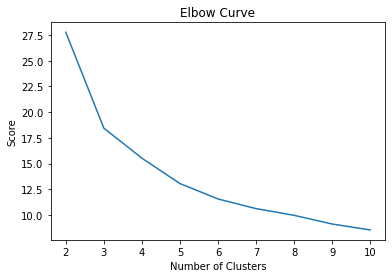

In [18]:
# Diagrama del codo
plt.plot(range(2, K_MAX),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

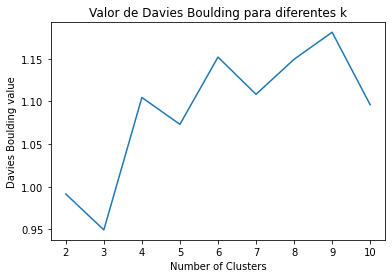

In [19]:
# Davies Boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

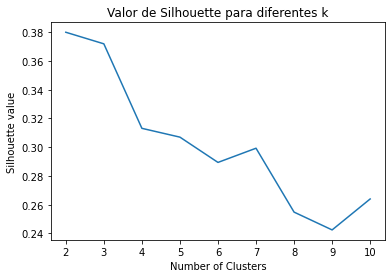

In [20]:
# Silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

En el *diagrama del codo*, en el punto K = 3 la curva deja de descender tan rápidamente.  
En el *índice Davies–Bouldin*, el mejor valor (el más pequeño) se obtiene también para K = 3.  
En el *coeficiente Silhouette*, el valor más cercano a 1 se obtiene también para K = 3.  
Por tanto, en el rango 2..10, el número óptimo de *clusters* es 3.

## 5) Descripción de los clusters

**Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster.**

*Cuidado: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.*

In [24]:
km = KMeans(init='random',n_clusters=3,random_state=RANDOM_STATE)
km.fit(scaled_values)
labels = km.labels_

dataframe_restricted['Cluster'] = labels

In [37]:
dataframe_restricted.groupby(['Cluster'])['GDP ($ per capita)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,40.0,24092.500000,7732.893030,8600.0,17950.0,25900.0,29025.0,37800.0
1,92.0,6523.913043,4524.690981,700.0,3275.0,5450.0,9000.0,21500.0
2,47.0,1480.851064,816.311508,500.0,800.0,1300.0,1850.0,4100.0


In [38]:
dataframe_restricted.groupby(['Cluster'])['Literacy (%)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,40.0,96.915000,3.872821,77.9,96.550,97.95,99.00,100.0
1,92.0,89.920652,8.884504,58.0,85.025,92.25,97.35,99.9
2,47.0,53.589362,14.501683,17.6,42.300,52.90,65.95,85.3


In [39]:
dataframe_restricted.groupby(['Cluster'])['Phones (per 1000)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,40.0,530.172500,138.167347,194.5,458.375,493.3,590.025,898.0
1,92.0,165.720652,107.955035,3.7,75.075,141.5,260.525,463.8
2,47.0,17.148936,23.621378,0.2,3.600,9.7,19.550,131.8


In [40]:
dataframe_restricted.groupby(['Cluster'])['Agriculture'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,40.0,0.027450,0.019916,0.000,0.01075,0.0215,0.0400,0.086
1,92.0,0.119283,0.084219,0.002,0.05800,0.0995,0.1640,0.370
2,47.0,0.340723,0.149452,0.073,0.24350,0.3220,0.4245,0.769


In [41]:
dataframe_restricted.groupby(['Cluster'])['Industry'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,40.0,0.245600,0.115622,0.032,0.17500,0.252,0.29800,0.585
1,92.0,0.334859,0.145356,0.088,0.22975,0.311,0.41225,0.906
2,47.0,0.232468,0.118078,0.040,0.16750,0.204,0.28150,0.666


In [42]:
dataframe_restricted.groupby(['Cluster'])['Service'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,40.0,0.726675,0.119561,0.375,0.6710,0.7290,0.78000,0.954
1,92.0,0.544826,0.134877,0.062,0.4450,0.5515,0.64075,0.818
2,47.0,0.426936,0.124527,0.177,0.3515,0.4060,0.54200,0.643


*Cluster 0*: Corresponde con el grupo de países con mayor desarrollo. Mayores recursos económicos, educativos, mayor cantidad de móviles, menor dedicación al sector agrícola y mayor dedicación al sector servicios.  
*Cluster 1*: Corresponde con el grupo de países con un desarrollo medio. También es el mayor grupo de países, el *cluster* más grande. Es interesante ver que estos países ostentan el mayor nivel de industrialización de los tres grupos.  
*Cluster 2*: Corresponde con el grupo de países con menor desarrollo. Menores recursos económicos, educativos, menor cantidad de móviles, mayor dedicación al sector agrícola y menor dedicación al sector servicios.  

Lo vemos a continuación más gráficamente.

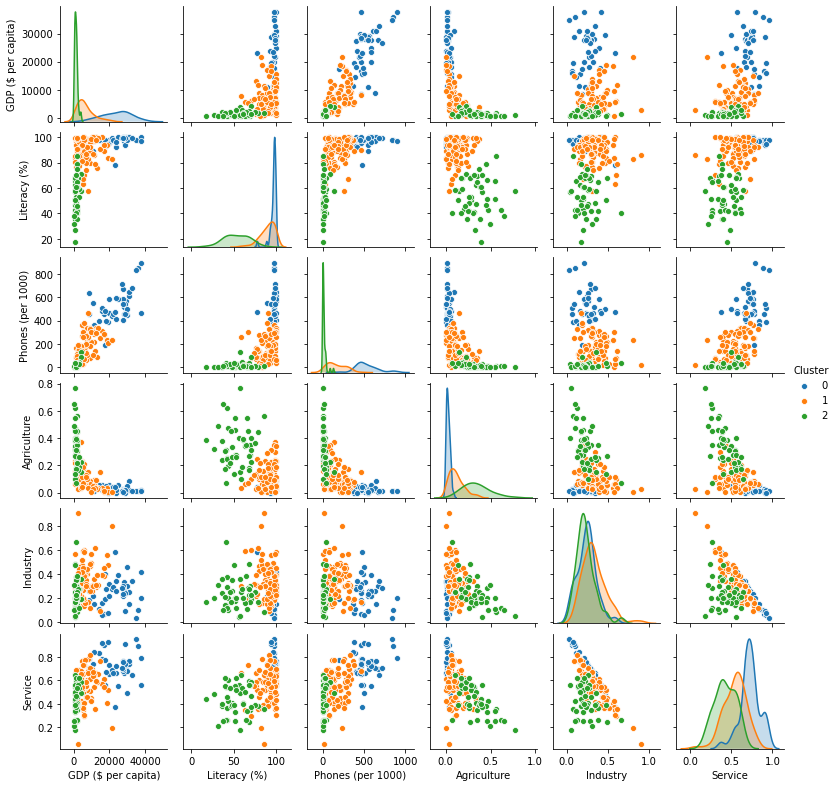

In [44]:
sns.pairplot(dataframe_restricted,hue='Cluster',height=1.8)

**¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?**

Los *clusters* más claramente diferenciados corresponden con los pares **`GDP ($ per capita)`** - **`Literacy (\%)`** - **`Phones (per 1000)`**.  
Es evidente que el alto nivel adquisitivo de un país está relacionado con una mayor alfabetización y con más cantidades de dispositivos móviles. Y es que estas tres variables son bastante interdependientes entre sí.  

También encontramos *clusters* bastante diferenciados entre los pares de variables **`GDP ($ per capita)`** - **`Agriculture`** y **`Phones (per 1000)`** - **`Agriculture`**. 

El resto de pares son más difusos y presentan más superposiciones que podemos observar gracias al reescalado previo. Esta mezcla es coherente con los datos numéricos porque la especialización en los distintos sectores, aunque sí que son influidos por el resto de variables, la distribución de la producción de los países es bastante equilibrada de media.